In [ ]:
from astropy.io import fits
import os
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import pandas as pd

def open_fits_catalog(fits_file):
    hdu_list=fits.open(fits_file, ignore_missing_end=True)
    #print hdu_list
    hdu = hdu_list[1]    # table extensions can't be the first extension, so there's a dummy image extension at 0
    #print hdu.header
    cat_table = Table(hdu.data)
    cols=hdu.columns
    return cat_table, cols

In [ ]:

if not os.path.exists("specz_catalog_XIIIecbpf.fits?dl=0"):
  !wget https://www.dropbox.com/s/38zmuj2zxuoigzk/specz_catalog_XIIIecbpf.fits?dl=0


mags = ['petroMag_'+band for band in 'ugri'] + ['z']
data, _ = open_fits_catalog("specz_catalog_XIIIecbpf.fits?dl=0")

for n,i in enumerate(mags):
  dd = data[i]
  for l,j in enumerate(dd):
    if j == 'null    ':
      data[i][l] = np.float32(0.0)

    else:
      data[i][l] = np.float32(j)

print(data) # data table

print(_)

    ra        dec      class  ... petroMagErr_r petroMag_i petroMagErr_i
--------- ------------ ------ ... ------------- ---------- -------------
146.62282  -0.95138526 GALAXY ...  0.03089815     18.05202  0.03665525  
146.59272  -0.76025604 GALAXY ...  0.01007535     16.50206  0.01019981  
 146.9108 -0.074559356 GALAXY ...  0.03387981     17.43746  0.04512536  
146.44831  -0.71339967 GALAXY ...  0.009233744    17.02182  0.008778921 
146.78847  -0.31065752 GALAXY ...  0.03382286     17.86618  0.03925543  
146.09369  -0.79308773 GALAXY ...  0.005180169    15.43335  0.004949708 
146.09369  -0.79308773 GALAXY ...  0.005180169    15.43335  0.004949708 
146.14358  -0.74164105 GALAXY ...  0.01563277     16.16855  0.01662161  
 146.7517  -0.40839151 GALAXY ...  0.005794456    15.66012  0.005502901 
146.72901  0.026971893 GALAXY ...  0.008034743    16.73619  0.007468184 
      ...          ...    ... ...           ...        ...           ...
16.216263  -0.64805448 GALAXY ...  0.01564686     1

In [ ]:

print(mags)

dataDF = pd.DataFrame(dict(data))
for i in mags:
  yy = dataDF[i]
  dataDF[i][dataDF[i] == "null    "] = "0.0"

  dataDF[i] = pd.to_numeric(dataDF[i])#.str.replace(",", ""), errors='coerce')

print(dataDF) # DataFrame


['petroMag_u', 'petroMag_g', 'petroMag_r', 'petroMag_i', 'z']


<ipython-input-3-468464546ad6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataDF[i][dataDF[i] == "null    "] = "0.0"


                ra       dec   class         z      zErr  petroMag_u  \
0       146.622820 -0.951385  GALAXY  0.371128  0.000069    22.40671   
1       146.592720 -0.760256  GALAXY  0.064959  0.000009    19.03327   
2       146.910800 -0.074559  GALAXY  0.242272  0.000086    20.18482   
3       146.448310 -0.713400  GALAXY  0.114698  0.000008    18.94475   
4       146.788470 -0.310658  GALAXY  0.056562  0.000015    20.73877   
...            ...       ...     ...       ...       ...         ...   
175916   16.005106 -0.855950  GALAXY  0.065073  0.000007    18.20492   
175917   15.651509 -0.637366  GALAXY  0.191313  0.000035    20.34421   
175918   15.866415 -1.159094  GALAXY  0.137276  0.000023    19.12054   
175919   15.624099 -0.813441  GALAXY  0.237502  0.000043    20.28428   
175920   15.332944 -0.624599  QSO     0.190939  0.000080    20.02614   

       petroMagErr_u  petroMag_g petroMagErr_g  petroMag_r petroMagErr_r  \
0       0.9912677       20.32166  0.09126051      18.62304 

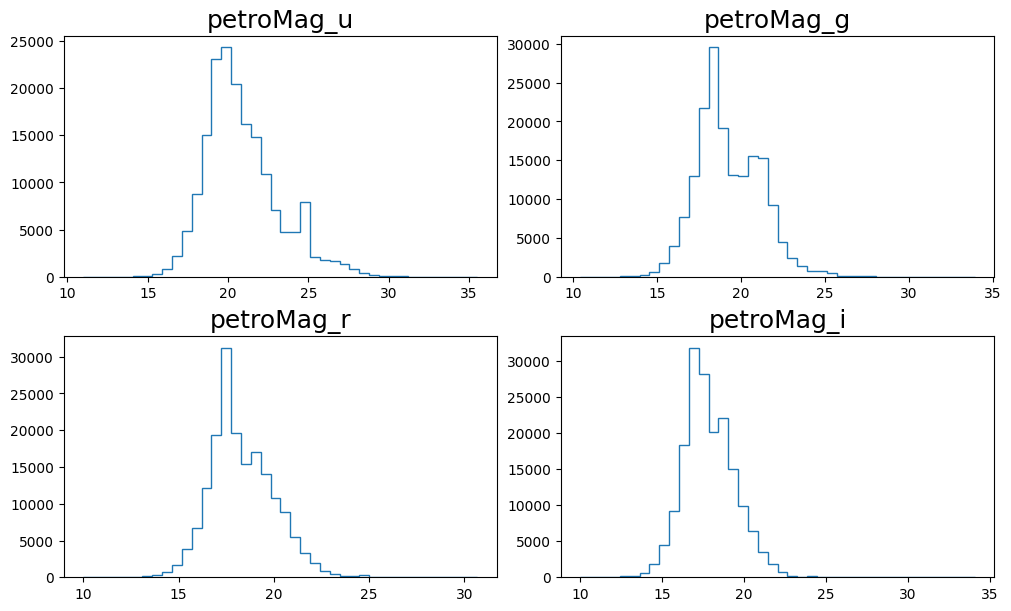

In [ ]:

f, ax = plt.subplots(2, 2, figsize=[10,6], constrained_layout=True)

for i, m in enumerate(mags[:-1]):
  row = i // 2
  col = i % 2
  ax[row,col].hist(dataDF[m][dataDF[m]>0], 40, histtype='step')
  ax[row,col].set_title(m, fontsize=18)
plt.show()

In [ ]:
# data = data_all
# key_list = mags
# color_list = ['black', 'green', 'red', 'tomato', 'palevioletred']
# hor = 2
# ver = 3

# plt.style.use('classic')

# fig = plt.figure(figsize=(14, 14), constrained_layout=True)
# gs = fig.add_gridspec(ver, hor, left=0.05, right=0.5, wspace=0.05)

# import math

# def ignore_nan(arr):
#     return max(filter(lambda x: not math.isnan(x), arr))

# i=0
# binsize=0.2
# def binarange(arr):
#     arr = np.array(arr)

#     arr1 = arr.copy()

#     arr1 = np.float32(arr1)

#     maxp = arr1.max() #np.float32(np.nanmax(arr1))
#     minp = arr1.min() #np.float32(ignore_nan(arr1))
#     # print(maxp)
#     # print(minp)
#     out = np.arange(minp, maxp+np.float32(binsize), binsize)
#     print(out.shape)
#     print(out)
#     print(arr1)

#     return out
#     #return np.arange(np.min(arr1), np.max(arr1)+np.float32(0.2), 0.2)


# for v in range(ver):
#     for h in range(hor):
#         if v==2:
#             ax = fig.add_subplot(gs[v, 0])
#             bins = binarange(data[key_list[i]])
#             ax.hist(data[key_list[i]], bins=bins, color=color_list[i], alpha=0.7)
#             ax.set_title(key_list[i])

#             ax = fig.add_subplot(gs[v, 1])
#             for c, key in enumerate(key_list):

#                 bins = binarange(data[key])
#                 ax.hist(data[key], bins=bins, color=color_list[c], alpha=1, label=key, histtype='step')
#             ax.set_title("All Mags")
#             plt.legend()

#             break
#             i+=1


#         mags = ['petroMag_'+band for band in 'ugriz']

#         ax = fig.add_subplot(gs[v, h])
#         print(key_list[i])
#         bins = binarange(data[key_list[i]])
#         ax.hist(data[key_list[i]], bins=bins, color=color_list[i], alpha=0.7)
#         ax.set_title(key_list[i])
#         i+=1

# plt.show

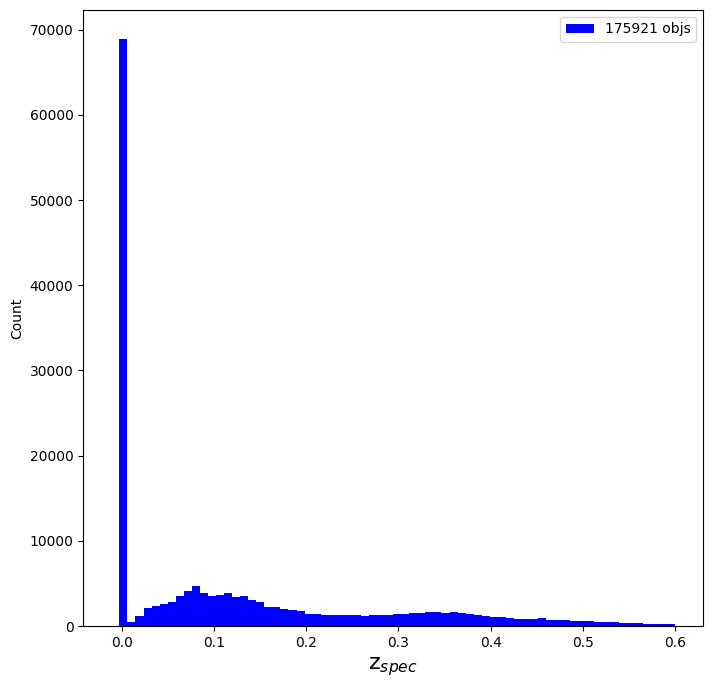

In [ ]:
#ZSPEC PLOTS

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.hist(np.array(data['z']), bins=70, color='blue', label=f'{len(data)} objs')
ax.set_xlabel('z$_{spec}$', fontsize=16)
ax.set_ylabel('Count')
plt.legend()

In [ ]:
#preprocessing

from sklearn.preprocessing import MinMaxScaler
np.random.seed(42)

train_percentual = 7/10
train_cut = np.random.uniform(0, 1, len(data)) < train_percentual
train_data = dataDF[train_cut]

test_val_data = data[~train_cut]

test_percentual = 2/3
test_cut = np.random.uniform(0, 1, len(test_val_data)) < test_percentual

test_data = test_val_data[test_cut]
val_data = test_val_data[~test_cut]

print(f'Train Percent = {len(train_data)/len(data)*100:.2f}%')
print(f'Test Percent = {len(test_data)/len(data)*100:.2f}%')
print(f'Val Percent = {len(val_data)/len(data)*100:.2f}%')

train_data = train_data.sample(frac=1)

print(f'Train Percent = {len(train_data)/len(data)*100:.2f}%')
print(f'Test Percent = {len(test_data)/len(data)*100:.2f}%')
print(f'Val Percent = {len(val_data)/len(data)*100:.2f}%')

x_train = np.array([train_data[mag] for mag in mags[:-1]]).T
print(x_train.shape)
y_train = np.array(train_data['z'])

x_test = np.array([test_data[mag] for mag in mags[:-1]]).T
y_test = np.array(test_data['z'])

x_val = np.array([val_data[mag] for mag in mags[:-1]]).T
y_val = np.array(val_data['z'])

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

# np.max(x_test[:, 1])

Train Percent = 69.96%
Test Percent = 19.99%
Val Percent = 10.04%
Train Percent = 69.96%
Test Percent = 19.99%
Val Percent = 10.04%
(123077, 4)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=2)
regr = regressor.fit(x_train, y_train)

preds = regr.predict(x_test)

In [ ]:
### CALCULO DAS MÉTRICAS E PLOTS
def get_zstatistic(z,zspec):

    deltaz=z-zspec
    mean_bias=np.mean(deltaz)


    p16=np.percentile(deltaz,15.85)
    p84=np.percentile(deltaz,84.05)
    sigma68=0.5*(p84-p16)
    median_bias=np.percentile(deltaz,50)
    return mean_bias,median_bias,sigma68


def redshift_plot(z, zspec):

    plt.style.use('default')

    fig = plt.figure(figsize=(10, 8))

    mean_bias,median_bias,sigma68=get_zstatistic(z, zspec)


    text="\n $\sigma_{68}$: $"+str(round(sigma68,3))+"$"
    text+="\n Mean Bias: $"+str(round(mean_bias,3))+"$"
    text+="\n Median Bias: $"+str(round(median_bias,3))+"$"
    ax = fig.add_subplot()

    #dispersão entre photo-z e spec-z
    ax.scatter(np.array(zspec), np.array(z),
                       alpha = 0.5,
                       s=8,marker='o')

    #reta x = y
    reta = [0, max([max(zspec), max(z)])]
    ax.plot(reta, reta,
              ls='dashed', color='black', lw=0.5)

    #limites e legendas
    ax.set_ylim(min(z),max(z))
    ax.set_xlim(0,max(zspec))
    ax.set_ylabel("$z_{phot}$", fontsize=15)
    ax.set_xlabel("$z_{spec}$", fontsize=15)
    ax.text(0.7*max(zspec), .2*max(z), text, va="top", fontsize=12)

    plt.show()


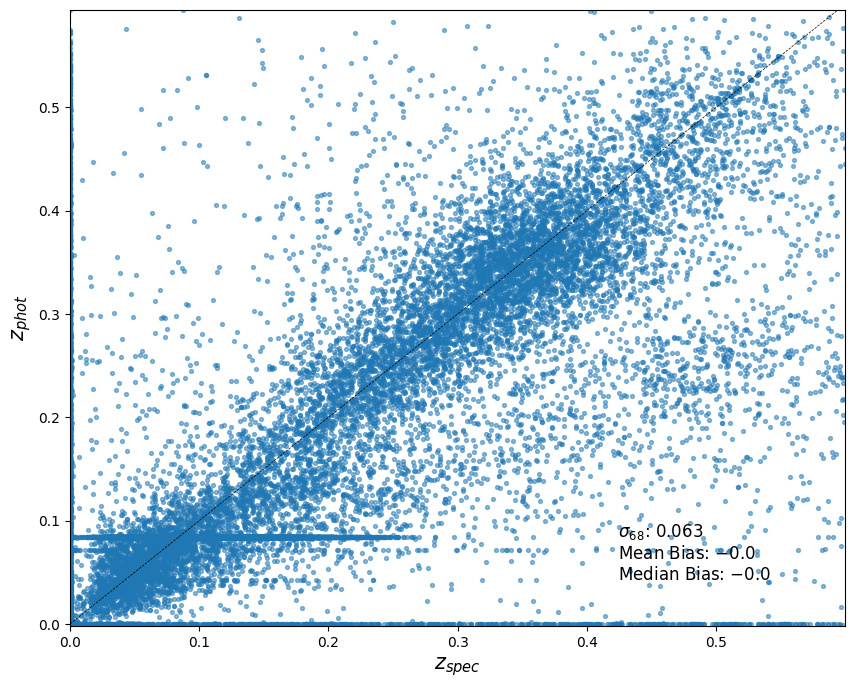

[0.08438082 0.27976099 0.08438082 ... 0.08438082 0.08438082 0.27073283]
[6.49592429e-02 2.42271706e-01 2.03889802e-01 ... 6.25412390e-02
 1.54290006e-01 5.63779395e-05]


In [ ]:
redshift_plot(preds, y_test)

